## ANALYSIS OF THE KENYAN DEBTS

Kenya, like many developing countries, has experienced significant economic growth over the past few decades. This growth has been accompanied by a substantial increase in national debt, as the government has sought to finance various development projects and infrastructure improvements. Understanding the structure, trends, and implications of this debt is crucial for policymakers, economists, and researchers.

This notebook looks into various Python-based data analysis and data science libraries in an attempt to gain insights on the following:

* Historical trends - an examination of the historical accumulation of debt, identify key periods of increase and their associated political and economic events.
* Debt Composition - a breakdown of the debt by type (domestic vs. external) and by currency denomination.
* Debt Sustainability - an assessment pf kenya's debt sustainability using various economic indicators and debt ratios.
* Economic Impact - an analysis of the impact of debt on kenya's economic performance, including GDP growth, inflation, and fiscal stability.

The following approach will be used:

1. Problem definition
2. Data
3. Features
4. Data cleaning
5. Visualizations

### 1. Problem definition

In a statement,

   > Given the various dataset attributes, can we analyze the structure, trends, and economic implication of  kenya's national debt, and to provide data-driven insight and recommendation for sustainability.

### 2. Data
The original data came from (link)

### 3. Features
*This is the data dictionary*

Attribute information:
1. Year
2. Month
3. Domestic debt
4. External debt
5. Total

### Preparing the tools
Using pandas, matplotlib, seaborn for data analysis and manipulation

In [5]:
# Regular EDA and plotting libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load data

In [6]:
df = pd.read_csv("public-debt-ksh-million.csv")
df.head()

,Year,Month,Domestic Debt,External Debt,Total
0,2021,December,"4,032,368.18","4,174,371.53","8,206,739.71"
1,2021,November,"4,008,077.30","4,109,282.85","8,117,360.15"
2,2021,October,"3,959,523.30","4,083,124.54","8,042,647.84"
3,2021,September,"3,937,777.45","4,062,504.78","8,000,282.23"
4,2021,August,"3,864,875.78","4,054,862.85","7,919,738.63"


### EDA - Exploratory Data Analysis

Done to find more about the data and become a subject matter expert on the dataset
1. what questions are we trying to solve?
2. what kind of data do we have and how do we different different types?
3. what's missing from the data and how do you deal with it?
4. where are the outliers and why should we care about them?
5. how can you add, change or remove features to get more out of our data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           262 non-null    int64 
 1   Month          262 non-null    object
 2   Domestic Debt  262 non-null    object
 3   External Debt  262 non-null    object
 4   Total          262 non-null    object
dtypes: int64(1), object(4)
memory usage: 10.4+ KB


### Data cleaning

#### Checking missing values and data types
Based on the above cell, our datasets:
* Our dataset has no missing values
* The year attribute is of the type `integer`
* The rest of the attributes are of the type `string`

Converting `domestic debt`, `external debt` and `total` to float type

In [9]:
# Remove commas and convert object columns to float
df['Domestic Debt'] = df['Domestic Debt'].str.replace(',', '').astype(float)
df['External Debt'] = df['External Debt'].str.replace(',', '').astype(float)
df['Total'] = df['Total'].str.replace(',', '').astype(float)
df.head(10)

,Year,Month,Domestic Debt,External Debt,Total
0,2021,December,4032368.18,4174371.53,8206739.71
1,2021,November,4008077.30,4109282.85,8117360.15
2,2021,October,3959523.30,4083124.54,8042647.84
3,2021,September,3937777.45,4062504.78,8000282.23
4,2021,August,3864875.78,4054862.85,7919738.63
5,2021,July,3792146.89,4020629.30,7812776.19
6,2021,June,3697093.18,4015299.38,7712392.57
7,2021,May,3686891.72,3799018.81,7485910.53
8,2021,April,3632914.80,3778131.44,7411046.24
9,2021,March,3569840.57,3769866.74,7339707.31


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           262 non-null    int64  
 1   Month          262 non-null    object 
 2   Domestic Debt  262 non-null    float64
 3   External Debt  262 non-null    float64
 4   Total          262 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 10.4+ KB


### Summary Statistics
To gain an overview of the dataset, we first examine the summary statistics for the domestic debt, external debt, and total debt from 1999 to 2021:

In [11]:
df.describe()

,Year,Domestic Debt,External Debt,Total
count,262.000000,2.620000e+02,2.620000e+02,2.620000e+02
mean,2010.572519,1.166927e+06,1.213153e+06,2.380080e+06
std,6.327015,1.058535e+06,1.104623e+06,2.159117e+06
min,1999.000000,1.834170e+05,3.119530e+05,5.022530e+05
25%,2005.000000,3.262354e+05,4.175753e+05,7.512072e+05
50%,2011.000000,7.328289e+05,6.230025e+05,1.361437e+06
75%,2016.000000,1.813763e+06,1.801866e+06,3.615630e+06
max,2021.000000,4.032368e+06,4.174372e+06,8.206740e+06


### Key Observations
* Count: There are 262 observations in the dataset, covering the years from 1999 to 2021.
* Mean: The average domestic debt is approximately 1.17 billion, the average external debt is approximately 1.21 billion, and the average total debt is approximately 2.38 billion.
* Standard Deviation (std): The standard deviation is quite high for all three types of debt, indicating significant variability in the debt amounts over the years.
* Minimum (min): The minimum recorded values for domestic debt, external debt, and total debt are 183,417, 311,953, and 502,253 respectively.
* 25th Percentile (25%): 25% of the observations have domestic debt below 326,235, external debt below 417,575, and total debt below 751,207.
* Median (50%): The median values are 732,829 for domestic debt, 623,002 for external debt, and 1,361,437 for total debt, indicating the middle point of the dataset.
* 75th Percentile (75%): 75% of the observations have domestic debt below 1.81 million, external debt below 1.80 million, and total debt below 3.62 million.
* Maximum (max): The maximum recorded values for domestic debt, external debt, and total debt are 4.03 million, 4.17 million, and 8.21 million respectively.


### Trends on Domestic and External Debt
To understand the evolution of Kenya's debt, we will visualize the trends in both domestic and external debt over the period from 1999 to 2021. The following plot illustrates these trends:

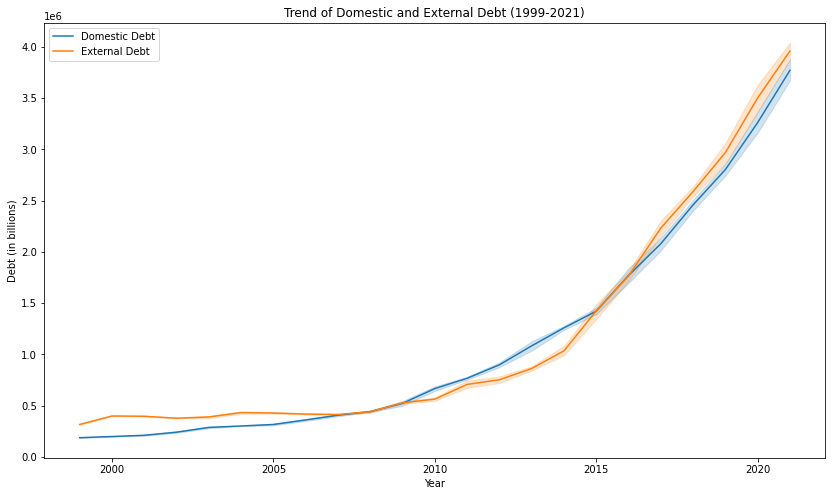

In [7]:
# Trends on domestic and External Debt
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Year', y='Domestic Debt', label='Domestic Debt')
sns.lineplot(data=df, x='Year', y='External Debt', label='External Debt')
plt.title('Trend of Domestic and External Debt (1999-2021)')
plt.xlabel('Year')
plt.ylabel('Debt (in billions)')
plt.legend()
plt.show()


The plot shows the year-by-year changes in both domestic and external debt, providing a clear visual representation of how each type of debt has evolved over the specified period. By examining this graph, we can identify key periods of significant debt accumulation and analyze the possible economic or policy-driven reasons behind these trends

### Yearly Total Debt

In addition to examining the trends in domestic and external debt separately, it is important to consider the overall yearly total debt. The following plot visualizes the total debt for each year from 1999 to 2021

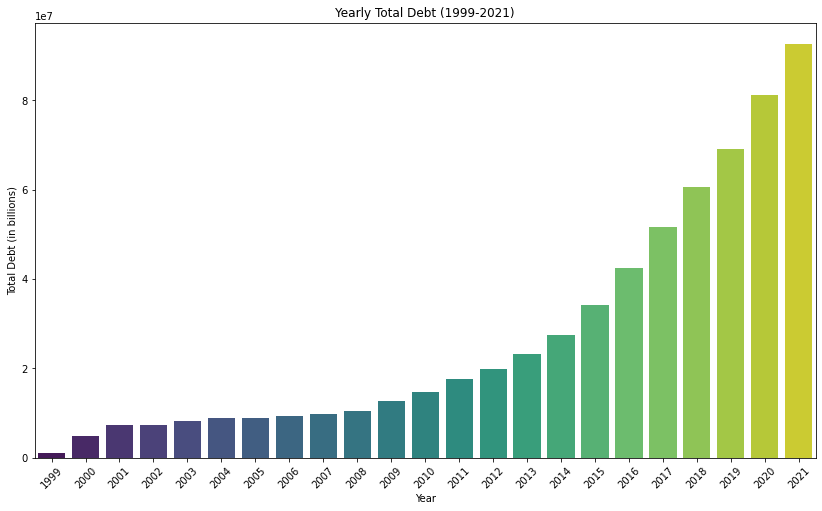

In [8]:
yearly_total_debt = df.groupby('Year')['Total'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=yearly_total_debt, x='Year', y='Total', palette='viridis')
plt.title('Yearly Total Debt (1999-2021)')
plt.xlabel('Year')
plt.ylabel('Total Debt (in billions)')
plt.xticks(rotation=45)
plt.show()


This bar plot displays the total debt accumulated each year, providing a clear picture of the yearly variations in the total debt burden. By analyzing this visualization, we can observe overall trends where the total debt has been increasing.
* From 1999-2007 - the total debt levels have been increasing but at a good rate.
* When the recession hit in 2008, the totals debt levels increased at an alarming rate.

### Comparison of Domestic and External Debts

To gain a comprehensive understanding of the relative proportions of domestic and external debts, we compare the two across the years. The following plot provides a visual comparison of domestic versus external debt from 1999 to 2021

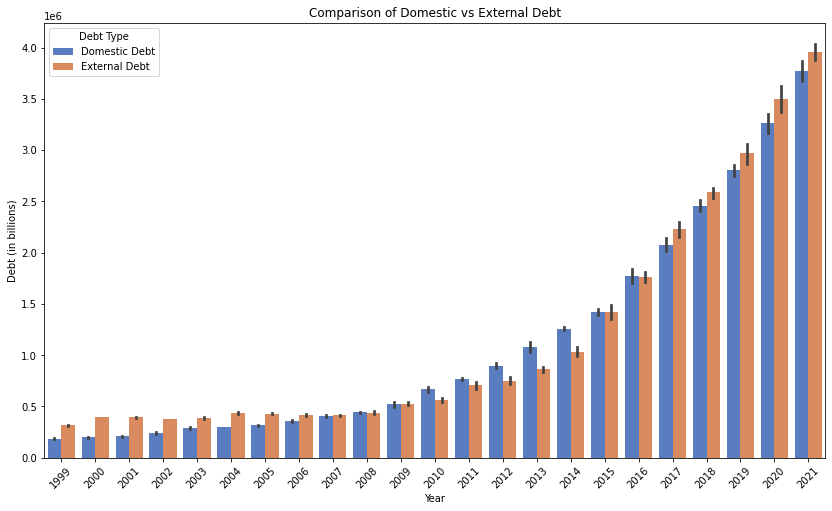

In [9]:
# Comparison of Domestic and External Debts
plt.figure(figsize=(14, 8))
sns.barplot(data=df.melt(id_vars=['Year', 'Month'], value_vars=['Domestic Debt', 'External Debt']), 
            x='Year', y='value', hue='variable', palette='muted')
plt.title('Comparison of Domestic vs External Debt')
plt.xlabel('Year')
plt.ylabel('Debt (in billions)')
plt.xticks(rotation=45)
plt.legend(title='Debt Type')
plt.show()


This bar plot displays both domestic and external debts side by side for each year, allowing us to observe the relative magnitude of each type of debt. By examining this comparison, we can identify that:
* as of `2017 to 2021`  and `1999-2006` the external debt has dominated domestic debts 
* from 2010 to 2016 the domestic debt has dominated the external debts

### Trend of Domestic and External Debt by President

To provide a deeper understanding of the debt trends, it is insightful to analyze how domestic and external debts have evolved under different presidential administrations. The following plot shows the trends of both domestic and external debt categorized by the serving president:

In [14]:
def categorize_president(year):
    if 1999 <= year <= 2002:
        return 'Daniel Moi'
    elif 2003 <= year <= 2013:
        return 'Mwai Kibaki'
    elif 2014 <= year <= 2021:
        return 'Uhuru Kenyatta'

# Apply the function to create a new column 'President'
df['President'] = df['Year'].apply(categorize_president)

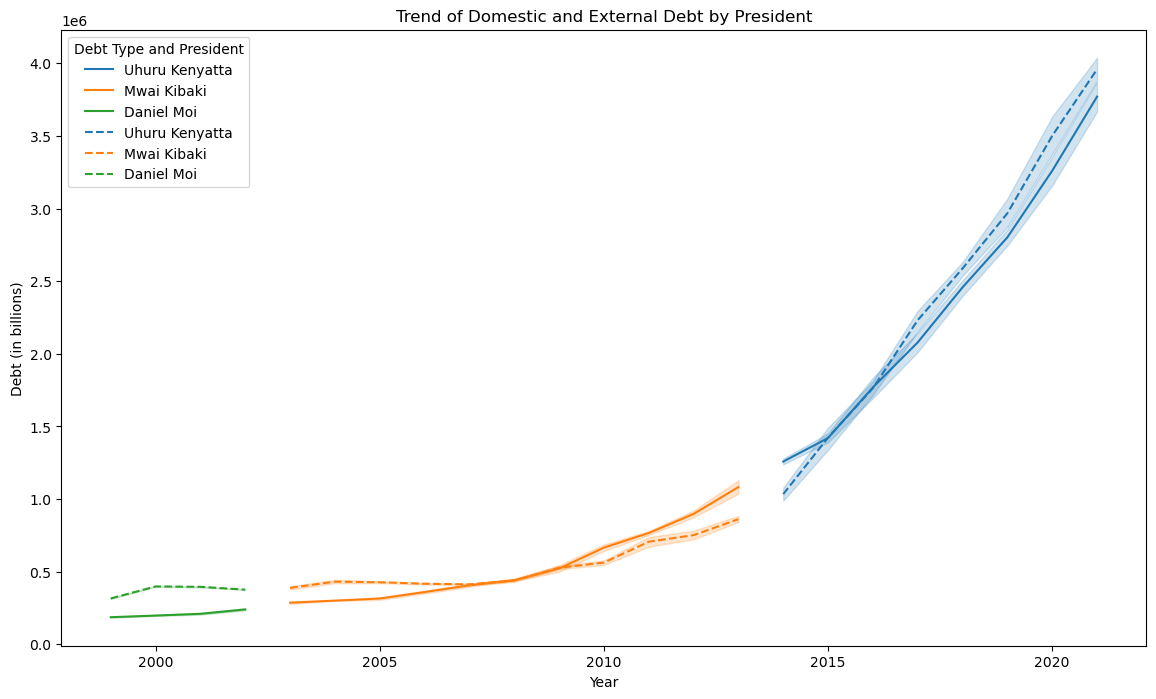

In [15]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Year', y='Domestic Debt', hue='President', palette='tab10')
sns.lineplot(data=df, x='Year', y='External Debt', hue='President', palette='tab10', linestyle='--')
plt.title('Trend of Domestic and External Debt by President')
plt.xlabel('Year')
plt.ylabel('Debt (in billions)')
plt.legend(title='Debt Type and President')
plt.show()


In this plot, domestic debt trends are represented by solid lines, while external debt trends are represented by dashed lines. Each color indicates a different president's term:

* Daniel Moi (1999-2002)
* Mwai Kibaki (2003-2013)
* Uhuru Kenyatta (2014-2021)

This categorization allows us to observe the impact of different presidential policies and economic conditions on the debt levels. By analyzing these trends, we can identify periods of significant debt changes and relate them to the respective president's administration:
* During Uhuru time there was a significant debt increase.
* We can also point out that in 2008 was the highest in debt recording

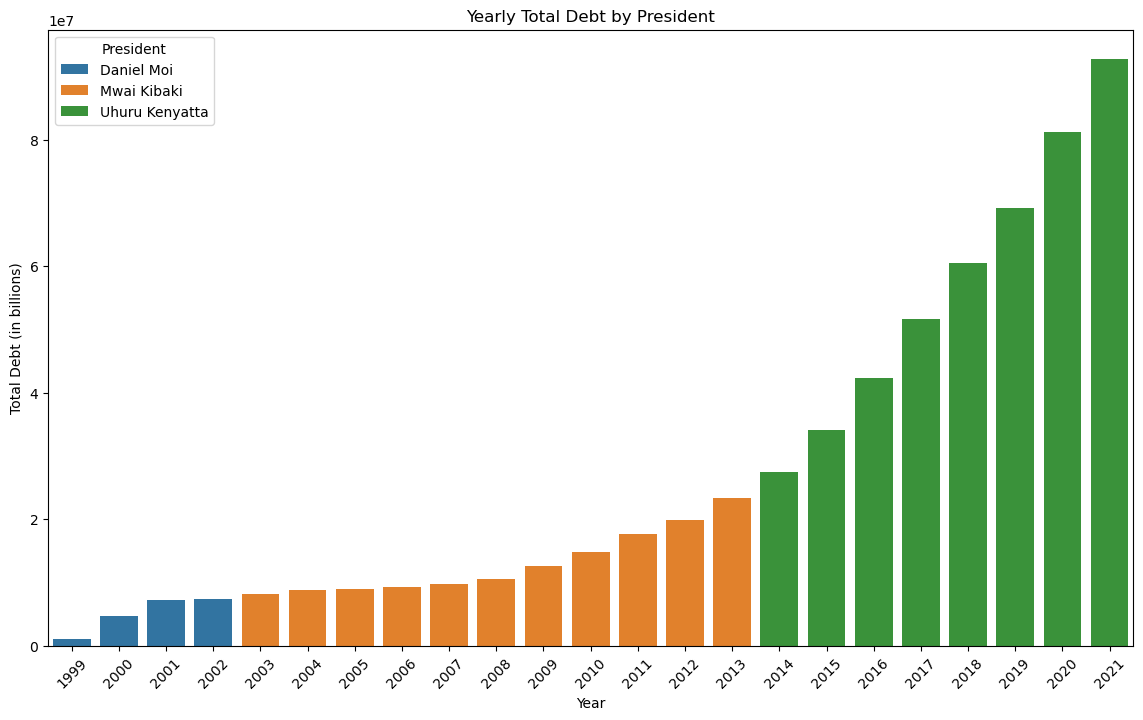

In [16]:
yearly_total_debt = df.groupby(['Year', 'President'])['Total'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=yearly_total_debt, x='Year', y='Total', hue='President', palette='tab10')
plt.title('Yearly Total Debt by President')
plt.xlabel('Year')
plt.ylabel('Total Debt (in billions)')
plt.legend(title='President')
plt.xticks(rotation=45)
plt.show()

### Impact of the Great Recession on Kenya's Debt (2008)
The global financial crisis, also known as the Great Recession, which began in 2007-2008, had far-reaching impacts on economies worldwide, including Kenya. The crisis led to a significant economic downturn, characterized by reduced export demand, lower commodity prices, and decreased foreign investment. As a result, many countries, including Kenya, faced fiscal pressures that necessitated increased borrowing to stabilize their economies.

#### Observing the Impact in the Debt Trends
In the graphs depicting the trends in domestic and external debt, we can observe the following:

* Increased Borrowing: During and after 2008, there is a noticeable increase in both domestic and external debt. This rise can be attributed to the government's    efforts to counteract the economic slowdown by financing various stimulus measures and social programs.
* Shift in Debt Composition: The trends might also show a change in the composition of debt, with possibly more reliance on external debt due to international aid and loans aimed at mitigating the crisis impacts.
* Economic Recovery Efforts: Post-2008, the continued increase in debt could be related to ongoing efforts to recover from the recession and invest in infrastructure and other development projects to stimulate economic growth.

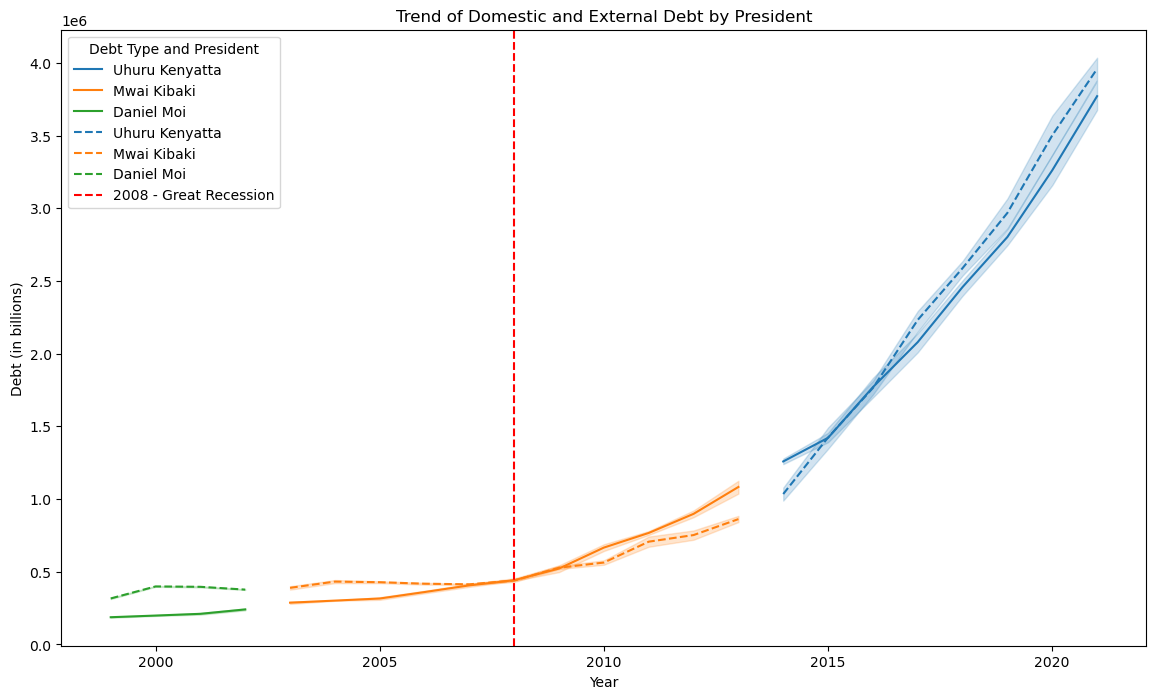

In [17]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Year', y='Domestic Debt', hue='President', palette='tab10')
sns.lineplot(data=df, x='Year', y='External Debt', hue='President', palette='tab10', linestyle='--')
plt.axvline(x=2008, color='red', linestyle='--', label='2008 - Great Recession')
plt.title('Trend of Domestic and External Debt by President')
plt.xlabel('Year')
plt.ylabel('Debt (in billions)')
plt.legend(title='Debt Type and President')
plt.show()

In this plot, the vertical red dashed line at 2008 marks the onset of the Great Recession. By examining the trends around this period, we can clearly see the increase in both domestic and external debt, reflecting the government's response to the economic challenges posed by the global financial crisis.

##### Conclusion
The Great Recession significantly impacted Kenya's economy, leading to increased borrowing as a means to stabilize and stimulate economic activity. This period is marked by a visible rise in both domestic and external debts, highlighting the government's fiscal measures to navigate through the global economic downturn.